In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv('./e-commerce_data(kaggle).csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format=("%m/%d/%Y %H:%M"))
df=df[df['Country']=='United Kingdom']

In [3]:
print(df.shape)
date_frm = datetime.strptime('12/09/2010 00:00', "%m/%d/%Y %H:%M")
date_to = datetime.strptime('12/10/2010 00:00', "%m/%d/%Y %H:%M")
df = df[(df['InvoiceDate'] >= date_frm) & (df['InvoiceDate'] <= date_to)]
print(df.shape)

(495478, 8)
(2635, 8)


In [4]:
data = df.iloc[:, [3,5]].values

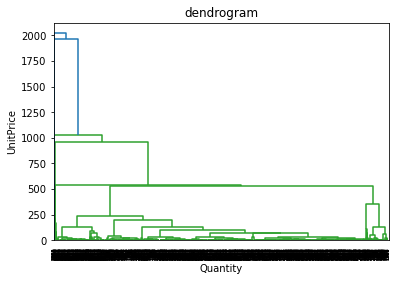

In [5]:
dendogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.rcParams["figure.figsize"] = (20,20)
plt.title('dendrogram')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [6]:
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='single')
cluster.fit_predict(data)

array([0, 0, 0, ..., 0, 0, 0])

Text(0, 0.5, 'UnitPrice')

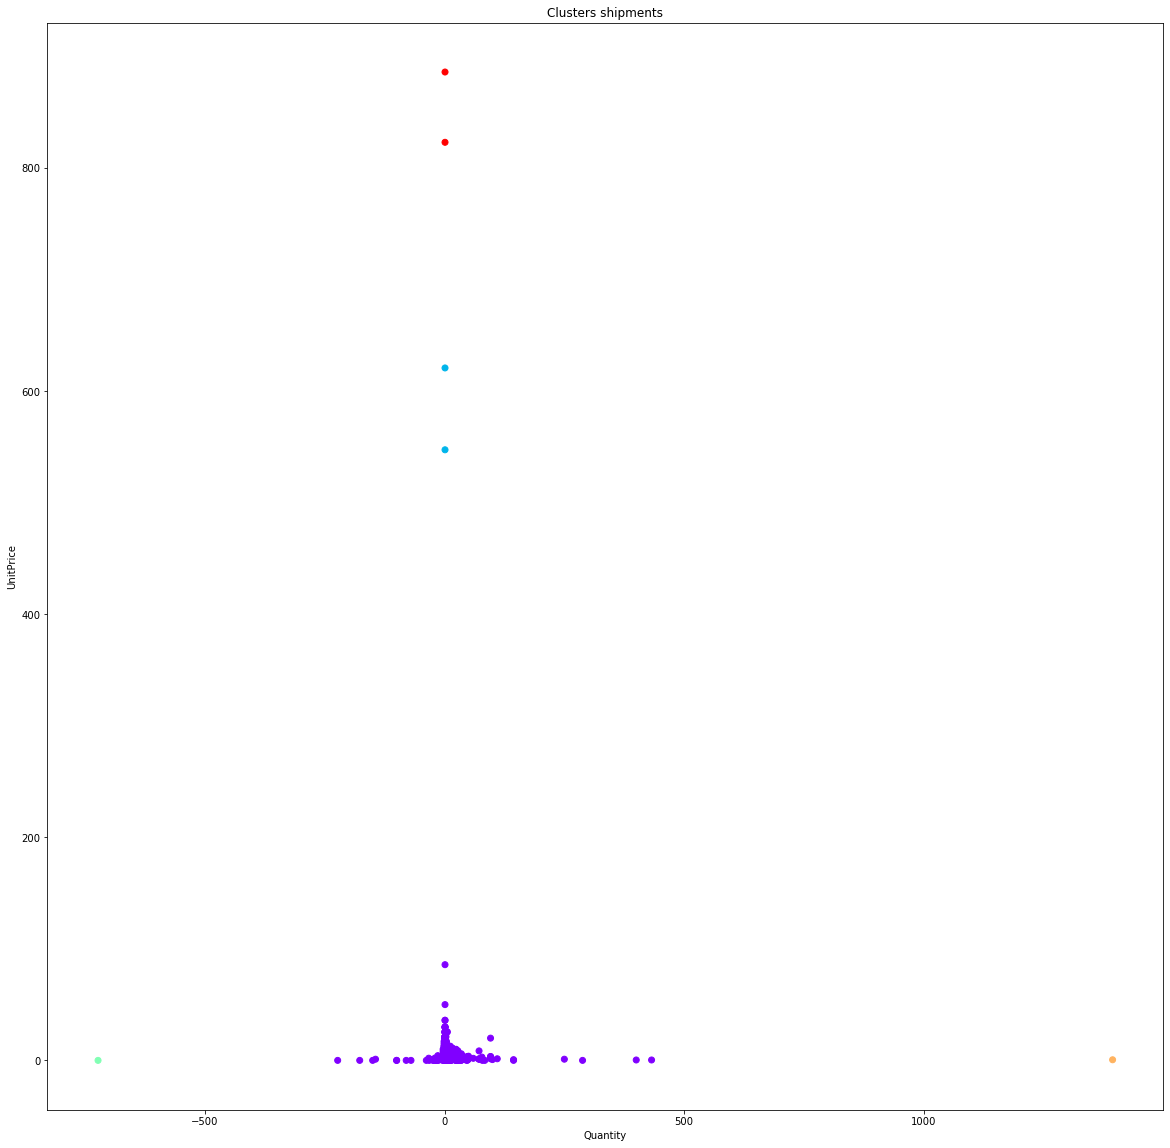

In [7]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Clusters shipments')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')